In [8]:
from IPython.lib.display import Audio
import numpy as np
import scipy.signal as signal
from scipy.fft import fft, fftshift, fftfreq
from matplotlib import pyplot as plt

In [9]:
# %matplotlib widget
%matplotlib inline

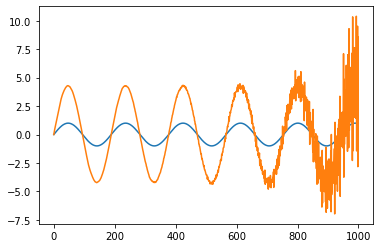

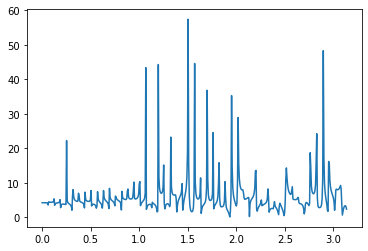

In [10]:
from scipy.signal import lfilter, freqz
filter_order = 100
b = np.random.uniform(40, 50, size=filter_order)
a = np.random.uniform(10, 11, size=filter_order)
# a = np.ones(filter_order)

x = np.sin(np.arange(1000)/30)
filt_x = lfilter(b, a, x)

plt.figure()
plt.plot(x)
plt.plot(filt_x)

w, h = freqz(b, a)

plt.figure()
plt.plot(w, abs(h))

# Functions

In [11]:
def autocorr(x, fs=1, bw=None, mode='same', figsize=4):
    autocorr_sig = signal.correlate(x, x, mode=mode)
    
    '''
    Amplitude
    '''
    time_axis = np.arange(0, len(autocorr_sig))/fs
    time_axis -= 0.5 * time_axis[-1]
    
    abs_acorr = abs(autocorr_sig)
    
    peak_width = fs / bw if bw is not None else 1
    thresh = 0.4*abs_acorr.max()
    peaks_loc, _ = signal.find_peaks(abs_acorr, height=thresh, distance=10 * peak_width)
    
    '''
    PHASE
    '''
    phase_unwarp = np.unwrap(np.angle(autocorr_sig))
    
    '''
    PLOTS
    '''
    plt.figure(figsize=(figsize*2.5, figsize))
    
    ax1 = plt.subplot(1, 2, 1)
    plt.title('Amplitude')
    plt.plot(time_axis, abs_acorr)
    plt.scatter(time_axis[peaks_loc], abs_acorr[peaks_loc])
    
    plt.subplot(1, 2, 2, sharex=ax1)
    plt.title('Phase')
    plt.plot(time_axis, phase_unwarp)
    plt.scatter(time_axis[peaks_loc], phase_unwarp[peaks_loc])

    plt.show()
    
    return autocorr_sig

In [12]:
def plot_spec(x):
    f_spec, t_spec, Sxx = signal.spectrogram(x, fs, return_onesided=False)

    plt.figure()
    plt.pcolormesh(fftshift(f_spec), t_spec, fftshift(Sxx.T, axes=1), shading='gouraud')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Time [sec]')
    plt.show()

# CW

In [13]:
fs = 7593
play_time_seconds = 2
N = fs*play_time_seconds

t = np.linspace(0.01, play_time_seconds, N)

f0 = 200  # Hz
x_cw_complex = np.exp(1j*2*np.pi*f0*t)

x_cw = np.real(x_cw_complex)

Audio(x_cw, rate=fs, autoplay=True)

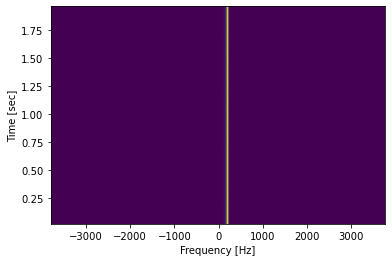

In [14]:
plot_spec(x_cw_complex)

# Sinusoidal Sweep

In [15]:
fs = 7593
play_time_seconds = 2
N = fs*play_time_seconds

t = np.linspace(0.01, play_time_seconds, N)
print(t.shape)


sweep_bw = 0.5
f_c = 200
# f = np.linspace(f_start, f_stop, N)
sweep_rate = 5  # Hz
changing_f = f_c + sweep_bw*np.sin(2*np.pi*sweep_rate*t)/t

freq_exp = np.exp(1j*2*np.pi*changing_f*t)

f0 = 5
x_complex = np.exp(1j*2*np.pi*f0*t)*freq_exp# + x_cw_complex

# noise = np.random.uniform(0, 10, size=N)
noise = 0

x_complex += noise

x = np.real(x_complex)

Audio(x, rate=fs, autoplay=True)

(15186,)


# BPSK

In [16]:
np.random.seed(999)

fs = 7821
duration = 1
bit_rate = 50

samples_per_bit = int(np.round(fs / bit_rate))
num_bits = bit_rate * duration
N = samples_per_bit * num_bits


t = np.linspace(0.01, duration, N)
bits = np.random.randint(0, 2, num_bits)
x_complex = np.repeat(bits, samples_per_bit) - 0.5

# f_c = 500
# freq_exp = np.exp(1j*2*np.pi*f_c*t)
# x_complex = freq_exp * x_bpsk

noise = np.random.normal(0, 0.001, size=N)
noise = 0

x_complex += noise

x = np.real(x_complex)

Audio(x, rate=fs, autoplay=True)

In [ ]:
np.cumsum(changing_f)

In [202]:
from scipy import signal
import numpy as np
pri = 10
t = np.linspace(0, 5, 100000)
duty_cycle = 0.5
fc = 0
bw = 50
changing_f = fc + bw*signal.sawtooth(2*np.pi*pri*t, width=duty_cycle)
x_complex = np.exp(1j*2*np.pi*changing_f*t)
x_complex = np.exp(1j*2*np.pi*np.cumsum(changing_f))

# Plots of the signal

## Time Plot

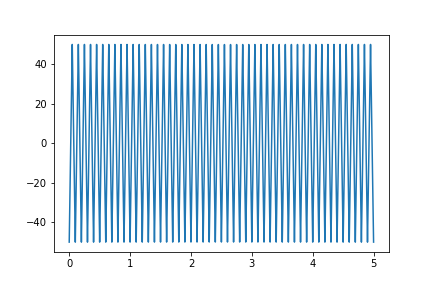

In [203]:
plt.figure()
plt.plot(t, changing_f)
# plt.xlim((0, 0.15))
plt.show()

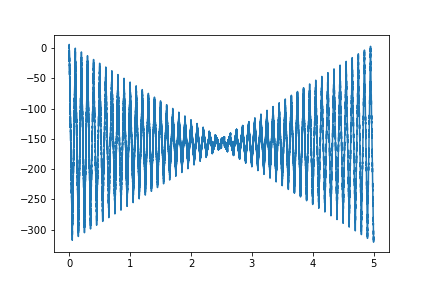

In [209]:
plt.figure()
plt.plot(t, np.unwrap(np.angle(x_complex)))
# plt.xlim((0, 0.15))
plt.show()

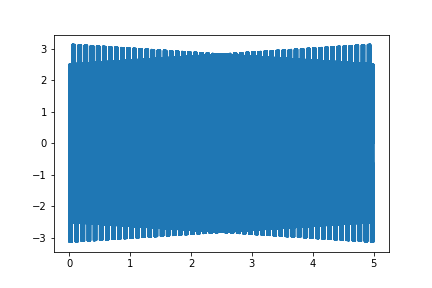

In [208]:
plt.figure()
plt.plot(t[:-1], np.diff(np.unwrap(np.angle(x_complex))))
# plt.xlim((0, 0.15))
plt.show()

### Fourier

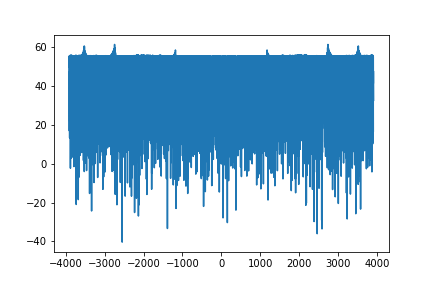

In [206]:
# x_short = x_bpsk[1400:1500]

f = fftfreq(len(x_complex))*fs
x_f = fft(x_complex)

plt.figure()
plt.plot(fftshift(f), 20*np.log10(np.abs(fftshift(x_f))))

### Spectrogram

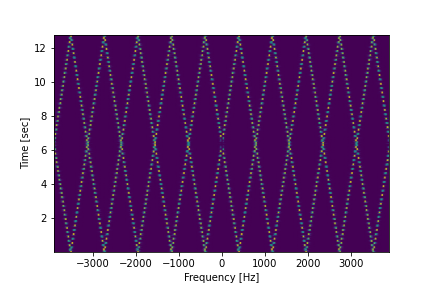

In [207]:
%matplotlib widget
plot_spec(x_complex)

### Constelation

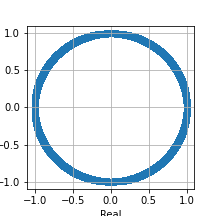

In [164]:
real = np.real(x_complex)
imag = np.imag(x_complex)

plt.figure(figsize=(3, 3))
plt.scatter(real, imag)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid()
plt.show()

## AutoCorr

In [67]:
%matplotlib widget
# %matplotlib inline

In [68]:
# acorr = autocorr(x_complex, fs=fs)

In [69]:
# def get_autocorr_peaks(
#     x, 
#     fs=1,
#     bw=None,
#     peak_width_factor=10,
#     autocorr_mode='same',
#     verbose_plots=False,
#     figsize=4
# ):
#     autocorr_sig = signal.correlate(x, x, mode=autocorr_mode)
    
#     '''
#     Amplitude
#     '''
#     time_axis = np.arange(0, len(autocorr_sig))/fs
#     time_axis -= 0.5 * time_axis[-1]
    
#     abs_acorr = abs(autocorr_sig)
    
#     peak_width = fs / bw if bw is not None else 1
#     thresh = 0.4*abs_acorr.max()
#     peaks_loc, peaks_prop = signal.find_peaks(
#         abs_acorr, 
#         height=thresh, 
#         distance=10 * peak_width
#     )
    
#     peaks_width, _, _, _ = signal.peak_widths(abs_acorr, peaks_loc)
    
#     '''
#     PHASE
#     '''
#     phase_unwarp = np.unwrap(np.angle(autocorr_sig))
    
    
    
#     '''
#     PEAK ENVIROMENTS
#     '''
#     peak_abs_env = []
#     peak_phase_env = []
#     for peak_loc, peak_width in zip(peaks_loc, peaks_width):
#         peak_width*=peak_width_factor
#         peak_abs_env.append(abs_acorr[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)])
#         peak_phase_env.append(phase_unwarp[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)])
    
    
    
    
#     '''
#     PLOTS
#     '''
#     if verbose_plots:
#         plt.figure(figsize=(figsize*2.5, figsize))

#         ax1 = plt.subplot(2, 1, 1)
#         plt.title('Amplitude')
#         plt.plot(time_axis, abs_acorr, label='signal')
#         plt.scatter(time_axis[peaks_loc], abs_acorr[peaks_loc], c='r', label='peaks')
#         for peak_loc, peak_width in zip(peaks_loc, peaks_width):
#             peak_width*=10
#             plt.plot(
#                 time_axis[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)],
#                 abs_acorr[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)],
#                 c='orange',
#                 label='peak enviroment'
#             )

#         plt.subplot(2, 1, 2, sharex=ax1)
#         plt.title('Phase')
#         plt.plot(time_axis, phase_unwarp, label='signal')
#         plt.scatter(time_axis[peaks_loc], phase_unwarp[peaks_loc], c='r', label='peaks')
#         # for peak_loc, peak_width in zip(peaks_loc, peaks_width):
#         #     plt.plot(
#         #         time_axis[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)],
#         #         phase_unwarp[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)],
#         #         c='orange',
#         #         label='peak enviroment'
#         #     )
#         # plt.legend()

#         plt.show()
    
#     return peak_abs_env, peak_phase_env

In [70]:
import torch

def get_autocorr_peaks(
    x, 
    fs=1,
    bw=None,
    peak_width_factor=10,
    autocorr_mode='same',
    verbose_plots=False,
    figsize=4
):
    autocorr_sig = signal.correlate(x, x, mode=autocorr_mode)
    
    '''
    Amplitude
    '''
    time_axis = np.arange(0, len(autocorr_sig))/fs
    time_axis -= 0.5 * time_axis[-1]
    
    abs_acorr = abs(autocorr_sig)
    
    peak_width = fs / bw if bw is not None else 1
    peak_loc = len(abs_acorr) // 2
    
    peaks_width, _, _, _ = signal.peak_widths(abs_acorr, [peak_loc])
    peak_width = peaks_width[0]
    
    '''
    PHASE
    '''
    phase_unwarp = np.unwrap(np.angle(autocorr_sig))
    
    
    
    '''
    PEAK ENVIROMENTS
    '''
    peak_width*=peak_width_factor
    peak_abs_env = abs_acorr[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)]
    peak_phase_env = phase_unwarp[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)]

    
    
    
    '''
    PLOTS
    '''
    if verbose_plots:
        plt.figure(figsize=(figsize*2.5, figsize))

        ax1 = plt.subplot(2, 1, 1)
        plt.title('Amplitude')
        plt.plot(time_axis, abs_acorr, label='signal')
        plt.scatter(time_axis[peak_loc], abs_acorr[peak_loc], c='r', label='peaks')
        plt.plot(
            time_axis[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)],
            peak_abs_env,
            c='orange',
            label='peak enviroment'
        )

        plt.subplot(2, 1, 2, sharex=ax1)
        plt.title('Phase')
        plt.plot(time_axis, phase_unwarp, label='signal')
        plt.scatter(time_axis[peak_loc], phase_unwarp[peak_loc], c='r', label='peaks')
        plt.plot(
            time_axis[int(peak_loc-peak_width//2) : int(peak_loc+peak_width//2)],
            peak_phase_env,
            c='orange',
            label='peak enviroment'
        )
        # plt.legend()

        plt.show()
    
    return torch.stack((torch.tensor(peak_abs_env), torch.tensor(peak_phase_env)))

In [71]:
peak_env

NameError: name 'peak_env' is not defined

In [ ]:
peak_env = get_autocorr_peaks(x_cw_complex, fs=fs, verbose_plots=True)

# Net

In [19]:
import torch

In [20]:
idx = 0
x_tensor = torch.tensor(np.array((peak_abs_env[idx], peak_phase_env[idx])))
x_tensor = x_tensor.unsqueeze(0).unsqueeze(0)
# x_tensor.shape

In [21]:

# ========================== IMPORTS ==================================
import torch
from torch import nn
from collections import OrderedDict
# ========================== IMPORTS ==================================




# ========================== FLAT NET ==================================


class FlatNet(nn.Module):
    def __init__(
        self,
        num_blocks=1,
        num_channels_in=2,
        num_channels_mid=32,
        num_channels_fin=64,
        device=torch.device('cpu'),
    ):
        super().__init__()
        
        self.device = device
        
        self.iNorm = nn.InstanceNorm1d(num_features=2)
        
        block_dict = OrderedDict([
            ('block1', ConvBlock(
            in_channels=num_channels_in,
            out_channels=num_channels_mid,
            dilation=1,
            padding=2,
            kernel_size=3))
        ])
        
        for i in range(1, num_blocks-1):
            block_dict.update([
                (f'block{i+1}', ConvBlock(
                    in_channels=num_channels_mid,
                    out_channels=num_channels_mid,
                    dilation=1,
                    padding=2,
                    kernel_size=3))
            ])
           
        block_dict.update([
            (f'block{num_blocks}', ConvBlock(
            in_channels=num_channels_mid,
            out_channels=num_channels_fin,
            dilation=1,
            padding=2,
            kernel_size=3))
        ])
        
        self.cnn = nn.Sequential(block_dict)
                
        self.adaptive_pooling = nn.AdaptiveAvgPool1d(output_size=1)
        
        self.output_activation = nn.Sigmoid()
        
    def forward(self, _input):
        """ 
         Classify a list of samples.
        :apram input: is a list of n tensors with different height and width ...
        :return scores: tensor of scores of shape (n, #nbr_classes)
         
        """
        for i, x in enumerate(_input):
            # x is an image.
            score = self._forward(x).unsqueeze(dim=0)
            if i == 0:
                scores = score
            else:
                scores = torch.cat((scores, score), dim=0)
        return scores
    
    def _forward(self, x):
        x = x.to(self.device).float()
        x = self.iNorm(x)
        x = self.cnn(x)
        x = self.adaptive_pooling(x)
        x = torch.flatten(x)
        x = self.output_activation(x)
        return x
    
    def to_device(self, device):
        try:
            self.to(device)
            self.device = device
        except Exception as e:
            print(e)
# ========================== FLAT NET ==================================







# ======================== CONV BLOCK =================================

class ConvBlock(nn.Module):
    def __init__(
        self,
        in_channels=3,
        out_channels=32,
        kernel_size=5,
        stride=1,
        padding=1,
        dilation=1,
        maxpool_kernel_size=2,
    ):
        super().__init__()
        
        self.conv = nn.Conv1d(
            in_channels,
            out_channels,
            kernel_size,
            stride=stride,
            padding=padding,
            dilation=dilation,
        )
        
        
        self.activation = nn.LeakyReLU()
        
        self.pooling = nn.MaxPool1d(maxpool_kernel_size)
    
    def forward(self, x):
        x = self.conv(x)
        x = self.activation(x)
        x = self.pooling(x)
        return x
# ======================== CONV BLOCK =================================

In [22]:
a = FlatNet(
    num_blocks=2,
    num_channels_in=2,
    num_channels_mid=32,
    num_channels_fin=64,
)
# torch.tensor(x_bpsk)
a(x_tensor).shape

torch.Size([1, 64])

In [210]:
from torch.nn import Dropout1d
Dropout1d??

Init signature: Dropout1d(p: float = 0.5, inplace: bool = False) -> None
Source:        
class Dropout1d(_DropoutNd):
    r"""Randomly zero out entire channels (a channel is a 1D feature map,
    e.g., the :math:`j`-th channel of the :math:`i`-th sample in the
    batched input is a 1D tensor :math:`\text{input}[i, j]`).
    Each channel will be zeroed out independently on every forward call with
    probability :attr:`p` using samples from a Bernoulli distribution.

    Usually the input comes from :class:`nn.Conv1d` modules.

    As described in the paper
    `Efficient Object Localization Using Convolutional Networks`_ ,
    if adjacent pixels within feature maps are strongly correlated
    (as is normally the case in early convolution layers) then i.i.d. dropout
    will not regularize the activations and will otherwise just result
    in an effective learning rate decrease.

    In this case, :func:`nn.Dropout1d` will help promote independence between
    feature maps and should b

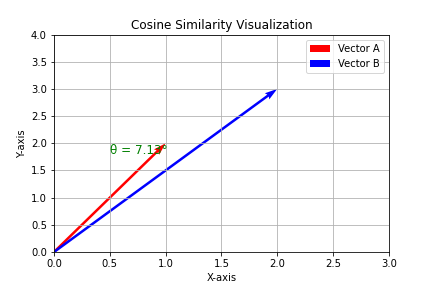

In [227]:
import numpy as np
import matplotlib.pyplot as plt

# Define vectors
A = np.array([1, 2])
B = np.array([2, 3])

# Create a plot
fig, ax = plt.subplots()
ax.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
ax.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# Set the limits and labels
ax.set_xlim(0, 3)
ax.set_ylim(0, 4)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Cosine Similarity Visualization')

# Calculate the cosine similarity
cosine_similarity = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
angle = np.arccos(cosine_similarity)
angle_degrees = np.degrees(angle)

# Plot the angle
ax.text(0.5, 1.8, f'θ = {angle_degrees:.2f}°', fontsize=12, color='g')

# Add legend
ax.legend()

# Show grid
plt.grid()

# Display the plot
plt.show()
